# Capstone Project IBM Data Science
## Andrés Alfaro Carvajal


### a) Importing Data

<h4>Importing Libraries</h4>

<p>As a preliminary step for the development of the project, <b>libraries</b>  that will be used are imported.</p>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             #visualisation
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
sns.set(color_codes=True)

## 1) Data Source and Description


<p>The data in <b>csv</b> format are exported from the URL address .</p>


In [2]:
df= pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

C:\Users\const\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<p>It is necessary to perform a preliminary analysis of the data with which the project will be developed, to know the variables and types of variables, the dimension of the data table, among other aspects.</p>

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.dtypes


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.shape

(194673, 38)

<p>The data is checked for <b>duplicated</b> rows.</p>

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 38)


In [7]:
df.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


<p>Since the objective of this project is to identify the factors that contribute to the incidence of accidents, weather and other variables on the freeway are selected for this analysis.</p>

In [8]:
data=df[["SEVERITYCODE","ADDRTYPE","WEATHER","LIGHTCOND","ROADCOND",'VEHCOUNT']]
data.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,LIGHTCOND,ROADCOND,VEHCOUNT
0,2,Intersection,Overcast,Daylight,Wet,2
1,1,Block,Raining,Dark - Street Lights On,Wet,2
2,1,Block,Overcast,Daylight,Dry,3
3,1,Block,Clear,Daylight,Dry,3
4,2,Intersection,Raining,Daylight,Wet,2


In [9]:
data.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
WEATHER         object
LIGHTCOND       object
ROADCOND        object
VEHCOUNT         int64
dtype: object

## 2. Data Cleaning

<p>An essential step for a good model development is the quality and cleaning of the data.</p>

In [10]:
print(data.isnull().sum())

SEVERITYCODE       0
ADDRTYPE        1926
WEATHER         5081
LIGHTCOND       5170
ROADCOND        5012
VEHCOUNT           0
dtype: int64


In [11]:
data = data.dropna()    # Dropping the missing values.
data.count()

SEVERITYCODE    187525
ADDRTYPE        187525
WEATHER         187525
LIGHTCOND       187525
ROADCOND        187525
VEHCOUNT        187525
dtype: int64

In [12]:
data.WEATHER.value_counts(dropna=False)

Clear                       110499
Raining                      32976
Overcast                     27551
Unknown                      14059
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [13]:
data.SEVERITYCODE.value_counts(dropna=False)

1    130642
2     56883
Name: SEVERITYCODE, dtype: int64

In [14]:
data.LIGHTCOND.value_counts(dropna=False)

Daylight                    115408
Dark - Street Lights On      48236
Unknown                      12599
Dusk                          5843
Dawn                          2491
Dark - No Street Lights       1526
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [15]:
data.ROADCOND.value_counts(dropna=False)

Dry               123736
Wet                47223
Unknown            14009
Ice                 1193
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

<p>For a better development of the model, the less frequent road conditions are classified into others, prioritizing more frequent conditions such as wet or dry weather.</p>

In [16]:
data['ROADCOND'].fillna(data['ROADCOND'].mode()[0], inplace=True)
data['ROADCOND'] = data['ROADCOND'].replace(['Unknown'],"Other")
data['ROADCOND'] = data['ROADCOND'].replace(['Ice'],"Other")
data['ROADCOND'] = data['ROADCOND'].replace(['Snow/Slush'],"Other")
data['ROADCOND'] = data['ROADCOND'].replace(['Standing Water'],"Other")
data['ROADCOND'] = data['ROADCOND'].replace(['Sand/Mud/Dirt'],"Other")
data['ROADCOND'] = data['ROADCOND'].replace(['Oil'],"Other")


In [17]:
data.ROADCOND.value_counts(dropna=False)

Dry      123736
Wet       47223
Other     16566
Name: ROADCOND, dtype: int64

<p> As with the road conditions, a new classification is generated for weather conditions</p>

In [18]:
data['WEATHER'].fillna(data['WEATHER'].mode()[0], inplace=True)
data['WEATHER'] = data['WEATHER'].replace(['Unknown'],"Other")
data['WEATHER'] = data['WEATHER'].replace(['Snowing'],"Other")
data['WEATHER'] = data['WEATHER'].replace(['Fog/Smog/Smoke'],"Other")
data['WEATHER'] = data['WEATHER'].replace(['Sleet/Hail/Freezing Rain'],"Other")
data['WEATHER'] = data['WEATHER'].replace(['Severe Crosswind'],"Other")
data['WEATHER'] = data['WEATHER'].replace(['Partly Cloudy'],"Other")
data['WEATHER'] = data['WEATHER'].replace(['Blowing Sand/Dirt'],"Other")
data.head()
data.WEATHER.value_counts(dropna=False)

Clear       110499
Raining      32976
Overcast     27551
Other        16499
Name: WEATHER, dtype: int64

In [19]:
data.ADDRTYPE.value_counts(dropna=False)

Block           123321
Intersection     63462
Alley              742
Name: ADDRTYPE, dtype: int64

In [20]:
data['LIGHTCOND'].fillna(data['LIGHTCOND'].mode()[0], inplace=True)
data['LIGHTCOND'] = data['LIGHTCOND'].replace(['Dark - Street Lights On'],'Dark')
data['LIGHTCOND'] = data['LIGHTCOND'].replace(['Dark - No Street Lights'],'Dark')
data['LIGHTCOND'] = data['LIGHTCOND'].replace(['Dark - Unknown Lighting'],'Dark')
data['LIGHTCOND'] = data['LIGHTCOND'].replace(['Dark - Street Lights Off'],'Dark')
data['LIGHTCOND'] = data['LIGHTCOND'].replace(['Unknown'],'Daylight')
data['LIGHTCOND'] = data['LIGHTCOND'].replace(['Other'],'Daylight')
data = data[data.WEATHER !="Other"]

In [21]:
data.LIGHTCOND.value_counts(dropna=False)

Daylight    114577
Dark         48491
Dusk          5612
Dawn          2346
Name: LIGHTCOND, dtype: int64

## 3) Exploratory Data Analysis

C:\Users\const\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


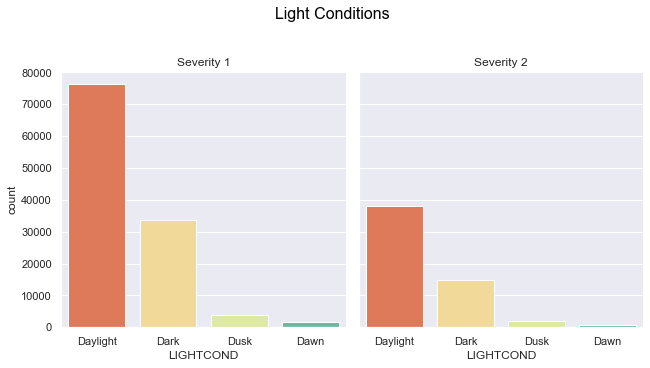

In [22]:
d = data.loc[:,["LIGHTCOND", "SEVERITYCODE"]]
d = d.groupby(["LIGHTCOND", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)

plot = sns.catplot("LIGHTCOND","count", col="SEVERITYCODE", data=d, kind="bar",palette = "Spectral",height=5, aspect=0.9)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('Light Conditions', fontsize=16,color ="Black")
plot.set_titles("Severity {col_name}",fontsize = 12)

C:\Users\const\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


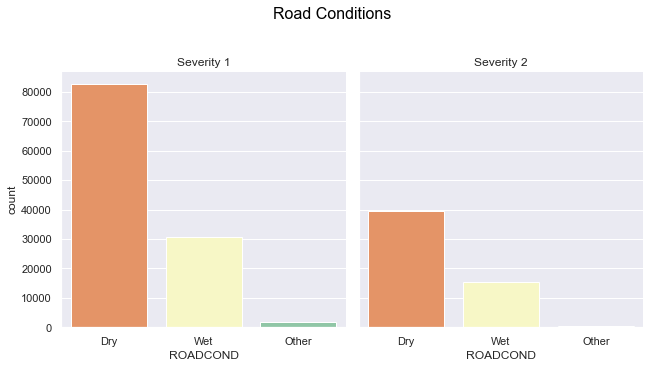

In [23]:
d = data.loc[:,["ROADCOND", "SEVERITYCODE"]]
d = d.groupby(["ROADCOND", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)

plot = sns.catplot("ROADCOND","count", col="SEVERITYCODE", data=d, kind="bar",palette = "Spectral",height=5, aspect=0.9)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('Road Conditions', fontsize=16,color ="Black")
plot.set_titles("Severity {col_name}",fontsize = 12)

In [24]:
data.VEHCOUNT.value_counts(dropna=False)

2     130720
1      24496
3      12533
4       2351
5        512
0        193
6        142
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

C:\Users\const\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


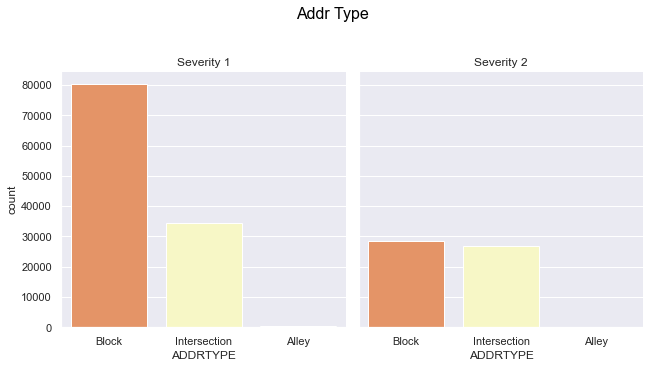

In [25]:
d = data.loc[:,["ADDRTYPE", "SEVERITYCODE"]]
d = d.groupby(["ADDRTYPE", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)

plot = sns.catplot("ADDRTYPE","count", col="SEVERITYCODE", data=d, kind="bar",palette = "Spectral",height=5, aspect=0.9)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('Addr Type', fontsize=16,color ="Black")
plot.set_titles("Severity {col_name}",fontsize = 12)

C:\Users\const\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


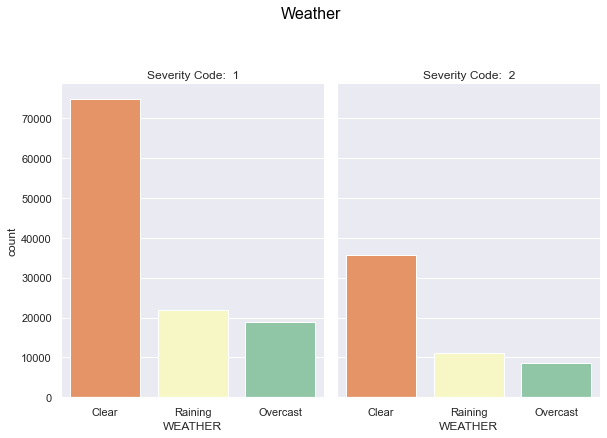

In [26]:
d = data.loc[:,["WEATHER", "SEVERITYCODE"]]
d = d.groupby(["WEATHER", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)

plot = sns.catplot("WEATHER","count", col="SEVERITYCODE", data=d, kind="bar",palette = "Spectral",height=6, aspect=0.7)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('Weather', fontsize=16,color ="Black")
plot.set_titles("Severity Code:  {col_name}",fontsize = 12)

C:\Users\const\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


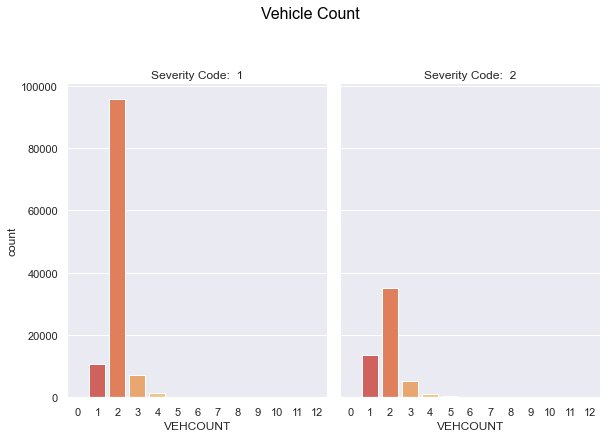

In [27]:
d = data.loc[:,["VEHCOUNT", "SEVERITYCODE"]]
d = d.groupby(["VEHCOUNT", "SEVERITYCODE"]).size().reset_index(name='count').sort_values(['count'], ascending= False)

plot = sns.catplot("VEHCOUNT","count", col="SEVERITYCODE", data=d, kind="bar",palette = "Spectral",height=6, aspect=0.7)
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('Vehicle Count', fontsize=16,color ="Black")
plot.set_titles("Severity Code:  {col_name}",fontsize = 12)

<p>Dummy variables are used to develop the model, i.e. categorical values are assigned an integer variable to facilitate model processing.</p>

In [28]:
Feature = data['VEHCOUNT']
Feature = pd.concat([Feature,pd.get_dummies(data['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(data['LIGHTCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(data['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(data['ADDRTYPE'])], axis=1)
Feature.head() 

,VEHCOUNT,Clear,Overcast,Raining,Dark,Dawn,Daylight,Dusk,Dry,Other,Wet,Alley,Block,Intersection
0,2,0,1,0,0,0,1,0,0,0,1,0,0,1
1,2,0,0,1,1,0,0,0,0,0,1,0,1,0
2,3,0,1,0,0,0,1,0,1,0,0,0,1,0
3,3,1,0,0,0,0,1,0,1,0,0,0,1,0
4,2,0,0,1,0,0,1,0,0,0,1,0,0,1


In [29]:
X=Feature.values
X[0:5]

array([[2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       [2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [3, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [30]:
y = data['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

## 4) Modeling: Classification

<p>In this section, different models will be developed and evaluated according to different criteria. The classification models to be developed are: <b>decision tree</b>, <b>logistic regression</b>, and <b>k neighboour</b>.</p>

###  4.1 Decision Tree

In [31]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (119718, 14) (119718,)
Test set: (51308, 14) (51308,)


In [33]:
from sklearn import metrics

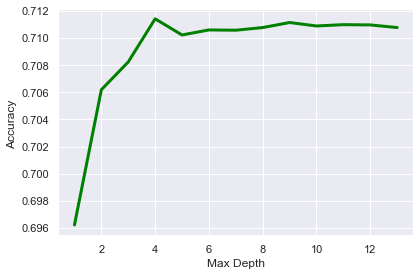

In [34]:
depth = 14
acc = []
for d in range(1,depth):
    dectree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dectree.fit(X_train,y_train)
    predtree = dectree.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, predtree))
plt.plot(range(1,depth),acc,'green',linewidth=3)
plt.ylabel('Accuracy ',fontsize =12)
plt.xlabel('Max Depth',fontsize =12)
plt.tight_layout()

plt.show()

In [35]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
predTree = Tree.predict(X_test)

In [38]:
from sklearn.metrics import f1_score
Tree_f1=f1_score(y_test, predTree, average='weighted') 
Tree_f1

0.6612958867523542

In [39]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
Tree_ac=metrics.accuracy_score(y_test, predTree)

DecisionTrees's Accuracy:  0.7114095267794496


###  4.2 Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, solver='liblinear')

In [41]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
log_ac=metrics.accuracy_score(y_test, yhat)

In [43]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7308333 , 0.2691667 ],
       [0.81386265, 0.18613735],
       [0.71591803, 0.28408197],
       ...,
       [0.72749561, 0.27250439],
       [0.56593975, 0.43406025],
       [0.72749561, 0.27250439]])

In [44]:
from sklearn.metrics import log_loss
log_losst=log_loss(y_test, yhat_prob)
log_losst

0.6084860994820228

In [45]:
from sklearn.metrics import f1_score
log_f1=f1_score(y_test, yhat, average='weighted') 
log_f1

0.5975088939659677

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34412     0]
 [    0     0]]


Confusion matrix, without normalization
[[34412   319]
 [15290  1287]]


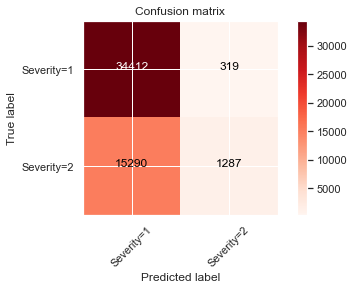

In [47]:

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, cmap = "Reds",classes=['Severity=1','Severity=2'],normalize= False,  title='Confusion matrix')

### 4.3  K-Near Neighbor

In [48]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

In [49]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [50]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [51]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
kn_ac=metrics.accuracy_score(y_test, yhat)

Test set Accuracy:  0.6895026116784907


In [52]:
from sklearn.metrics import f1_score
kn_f1=f1_score(y_test, yhat, average='weighted') 
kn_f1

0.6433885791432681

##  5) Evaluation and Conclusions


In [53]:
logloss = ['NA','NA', log_losst]
f1 = [kn_f1,Tree_f1, log_f1]
acur = [kn_ac,Tree_ac, log_ac]

f = pd.DataFrame(acur, index=['K-N','Decision Tree', 'Logistic'])
f.columns = ['Accuracy']
f.insert(loc=1, column='F1 Score', value=f1)
f.insert(loc=2, column='Log Loss', value=logloss)
f.columns.name = 'Type'
f

Type,Accuracy,F1 Score,Log Loss
K-N,0.689503,0.643389,NA
Decision Tree,0.711410,0.661296,NA
Logistic,0.695778,0.597509,0.608486


#### Finally, each model offers a medium high level of precision. The model that is recommended, however, corresponds to the decision tree since it offers the best indicators, surpassing the other models.